In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/ASUS/Downloads/loan-data/loan.csv") #reading the data

C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape #initial shape of data

(2260668, 145)

In [5]:
data.dropna(axis=1, thresh=1130334, inplace=True) #droppin columns where blank values are >= 50%, using such ahigh value to save time

In [6]:
data.shape #size of data after dropping columns with >=50% blank values

(2260668, 101)

In [7]:
data.drop_duplicates(inplace=True) 

In [8]:
data.shape #no duplicate rows were found

(2260668, 101)

In [9]:
data['tax_liens'].nunique()

42

In [10]:
"""
creating a function to find columns where all the values are same, ie only 1 unique value
and then dropping that column as that feature will not affect our analysis
"""

def f_c_f(df):
    cf=[]
    for column in list(df.columns):
        if df[column].unique().size<2:  #checking each column where no. of unique value < 2
            cf.append(column)           # adding the column name to list of columns to be removed
    return cf
cf=f_c_f(data)
print(cf)
data.drop(cf, axis=1, inplace=True)     #dropping all such columns from the data

['policy_code']


In [11]:
print(list(data.columns)) #a liist of all column headings

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal

In [12]:
data['loan_status'].value_counts() # We take loan_status as our target variable and check which all values it takes in our data 

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [13]:
"""
To ease our analysis we drop all the rows where value of loan_status isnt one of the following values

We do it as we are only looking to analyze which were the good loans and which were the bad loans, so data on current
loan or loans in grace period cannot help us identify such loans
"""
data = data.loc[(data['loan_status'].isin(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Default']))]

In [14]:
data.shape

(1325535, 100)

In [15]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
100,30000,30000,30000.0,36 months,22.35,1151.16,D,D5,Supervisor,5 years,...,33.3,1.0,0.0,527120.0,98453.0,28600.0,101984.0,N,Cash,N
152,40000,40000,40000.0,60 months,16.14,975.71,C,C4,Assistant to the Treasurer (Payroll),< 1 year,...,42.9,0.0,0.0,344802.0,161720.0,45700.0,167965.0,N,Cash,N
170,20000,20000,20000.0,36 months,7.56,622.68,A,A3,Teacher,10+ years,...,20.0,0.0,0.0,622183.0,71569.0,85100.0,74833.0,N,Cash,N
186,4500,4500,4500.0,36 months,11.31,147.99,B,B3,Accounts Examiner III,10+ years,...,0.0,0.0,0.0,53795.0,29137.0,15100.0,24595.0,N,Cash,N
215,8425,8425,8425.0,36 months,27.27,345.18,E,E5,Senior Director Risk Management,3 years,...,50.0,0.0,0.0,768304.0,189194.0,45800.0,189054.0,N,Cash,N


In [16]:
"""
We rename all data under Default, Charged Off and Late for more than 30 days as Bad debt, as these are the examples we
need to avoid getting in the future
"""

data.loc[(data.loan_status == 'Charged Off', 'loan_status')] = 'Bad Debt'
data.loc[(data.loan_status == 'Late (31-120 days)', 'loan_status')] = 'Bad Debt'

In [17]:
data.loan_status.value_counts()

Fully Paid    1041952
Bad Debt       283552
Default            31
Name: loan_status, dtype: int64

In [18]:
print(list(data.columns))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal

In [19]:
data.annual_inc.value_counts()

60000.00    51329
50000.00    45130
65000.00    38165
70000.00    36439
40000.00    35008
            ...  
65292.00        1
65290.00        1
65287.00        1
65286.00        1
91108.39        1
Name: annual_inc, Length: 63725, dtype: int64

In [20]:
"""
We create a function to plot 2 graphs for any of the variable, taking into account whther they are continuous
or categorical variable

graph - 1 : a plot of simply the variable against its frequency, hitogram in case of continuous and bargraph in case of categorical

graph - 2 : a plot where we compare how this variable affects our target variable ie. loan_status
        
        #in case of continuous variable it is 2 kde plot one for fully paid and one for bad debt to see how the
        probability distribution of both changes with the variable
        
        #in case of categorical variable it is a double bargraph to see how much percent of each category does fully paid loans
        and bad debt loans take in each category respectively
"""

def featplot(feat, cont):
    fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8), dpi=100)
    
    if cont==True:
        sns.distplot(data.loc[data[feat].notnull(), feat], ax=ax1)    #distribution plot for continous variable
    
    else:
        sns.countplot(data.loc[data[feat].notnull(), feat], ax=ax1)    #freq graph for categorical variable
        
        plt.xticks(rotation=45)
    
    ax1.set_xlabel(feat)
    ax1.set_ylabel('total')
    plt.tight_layout()
    
    if cont==True:
        sns.kdeplot(data.loc[(data['loan_status']=='Fully Paid'),
            feat], color='r', shade=True, Label='Fully Paid', ax=ax2)    # kdep plotof fully paid loans
  
        sns.kdeplot(data.loc[(data['loan_status']=='Bad Debt'), 
            feat], color='b', shade=True, Label='Bad Debt', ax=ax2)      # kde plot of bed debt loans
        
    
    else:
        data2=data.groupby(feat)['loan_status'].value_counts(normalize=True).to_frame('percent').reset_index()
        sns.barplot(x=feat, y='percent', hue='loan_status', data=data2, ax=ax2)
        
        plt.xticks(rotation=45)                                           # grouping all data by fully paid or bad debt and then plotting their graph in the required category
        
    plt.tight_layout()

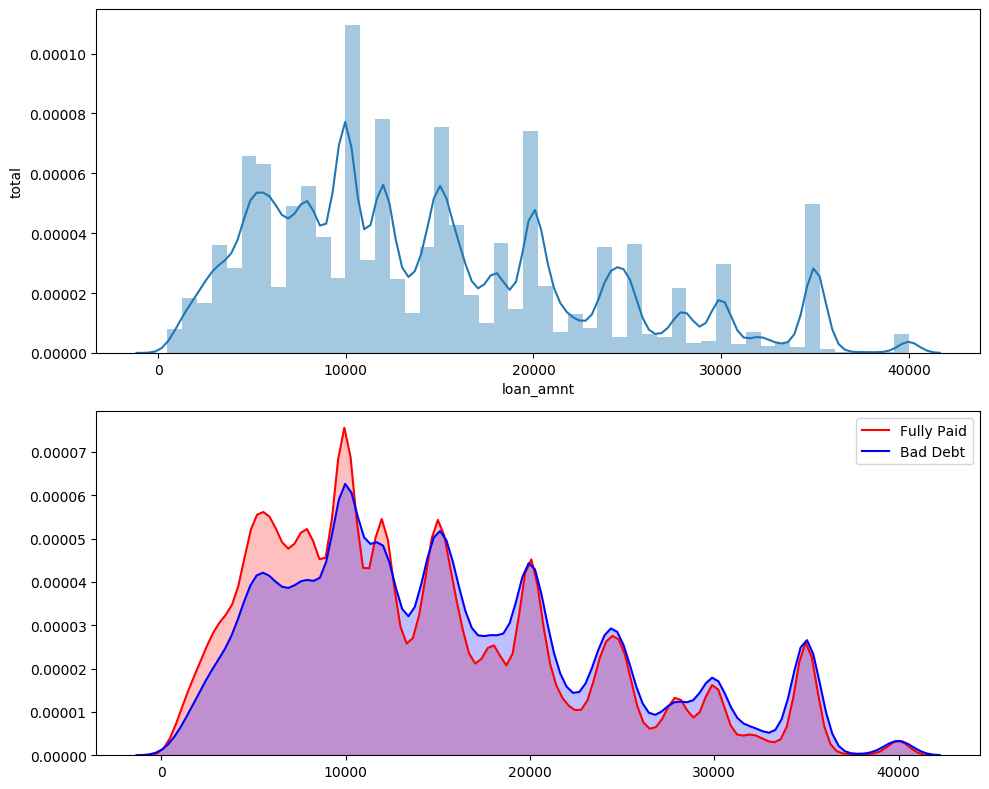

In [21]:
featplot('loan_amnt', True)

In [22]:
print(list(data.columns))
print(len(list(data.columns)))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal

In [23]:
"""
After quickly going through individual features based on the plots above for different features we decided which 
feature were relevant to our target variable ie. loan_status and which varibales were irrelevant and could be removed

We decide the following feature were either not relevant to our variable or they did seem to have any impact on it
"""

dropfeat=['emp_title', 'issue_d', 'title', 'zip_code', 'addr_state', 'emp_length',
          'mths_since_recent_bc', 'total_il_high_credit_limit','debt_settlement_flag',
          'total_bc_limit', 'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75','pct_tl_nvr_dlq', 
          'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'num_sats','num_rev_accts', 
          'num_rev_tl_bal_gt_0', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_accts_ever_120_pd', 
          'num_actv_bc_tl', 'num_actv_rev_tl','mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 
          'mo_sin_rcnt_tl','bc_util', 'chargeoff_within_12_mths', 'avg_cur_bal', 'bc_open_to_buy',
          'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d', 
          'last_pymnt_amnt', 'last_credit_pull_d','recoveries', 'collection_recovery_fee','inq_last_6mths',
          'revol_bal', 'revol_util','initial_list_status','out_prncp', 'out_prncp_inv','collections_12_mths_ex_med',
          'acc_now_delinq','tot_coll_amt', 'tot_cur_bal','open_acc_6m', 'open_act_il', 'open_il_12m', 
          'open_il_24m','hardship_flag','mort_acc', 'total_cu_tl','total_rev_hi_lim','open_rv_12m', 'open_rv_24m']
          

In [24]:
finaldata=data.drop(list(set(dropfeat)), axis=1)   #we drop the irrevelant features
finaldata.shape


(1325535, 34)

In [25]:
finaldata.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
dti                         340
delinq_2yrs                   0
earliest_cr_line              0
open_acc                      0
pub_rec                       0
total_acc                     0
application_type              0
mths_since_rcnt_il       819596
total_bal_il             805854
il_util                  875663
max_bal_bc               805854
all_util                 805909
inq_fi                   805854
inq_last_12m             805855
acc_open_past_24mths      47281
delinq_amnt                   0
mths_since_recent_inq    171364
pub_rec_

In [26]:
finaldata.dropna(axis=1, thresh=670000, inplace=True) #we again drop columns where blanks values >=50%

In [27]:
finaldata.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
dti                         340
delinq_2yrs                   0
earliest_cr_line              0
open_acc                      0
pub_rec                       0
total_acc                     0
application_type              0
acc_open_past_24mths      47281
delinq_amnt                   0
mths_since_recent_inq    171364
pub_rec_bankruptcies        697
tax_liens                    39
disbursement_method           0
dtype: int64

In [28]:
"""
Checking pattern of each individual feature

First we chek the value count of variable to see whether its a continuos or categorical variable

Then we plot the relevant grapgh using our function to check its trend
"""


finaldata['sub_grade'].value_counts()

C1    84218
B4    81692
B5    80907
B3    80291
C2    78263
C3    74177
C4    73845
B2    72452
B1    69574
C5    67074
A5    62491
D1    51043
A4    50879
D2    44545
A1    41397
D3    39247
A3    36830
A2    35962
D4    35451
D5    29987
E1    23696
E2    21379
E3    18425
E4    15741
E5    14559
F1    10001
F2     7210
F3     6120
F4     4897
F5     3975
G1     3005
G2     2151
G3     1622
G4     1300
G5     1129
Name: sub_grade, dtype: int64

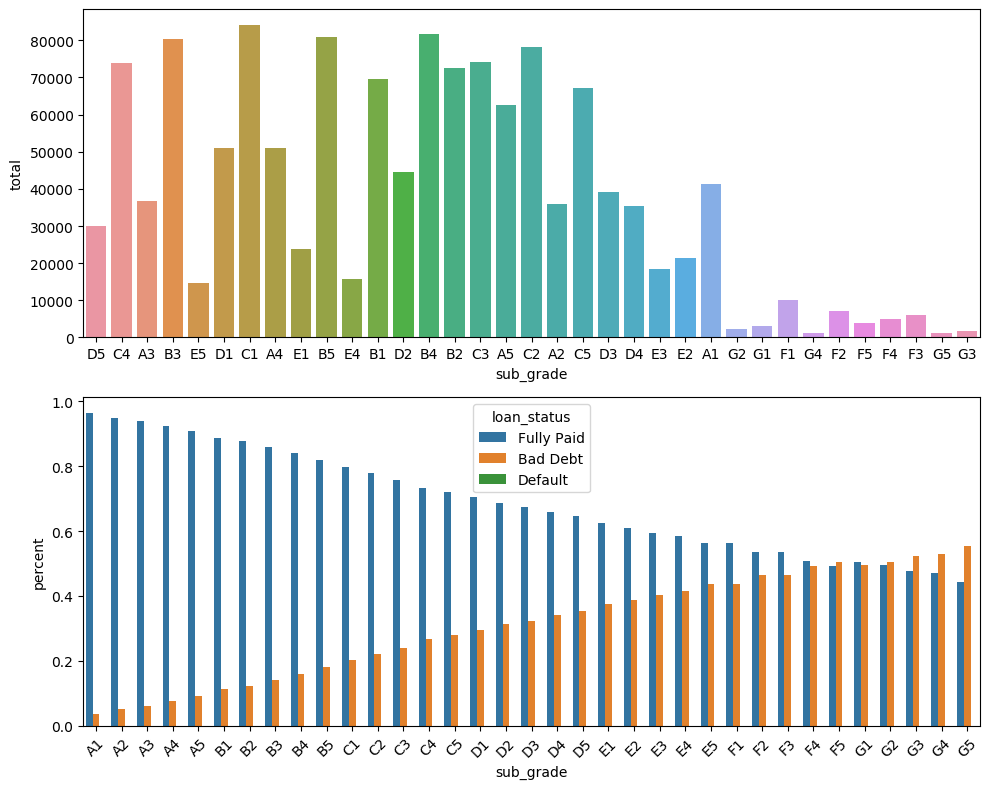

In [29]:
featplot('sub_grade', False)

In [30]:
finaldata['open_acc'].value_counts()

9.0     117720
10.0    114635
8.0     112906
11.0    105816
7.0     101583
         ...  
90.0         1
81.0         1
82.0         1
84.0         1
71.0         1
Name: open_acc, Length: 84, dtype: int64

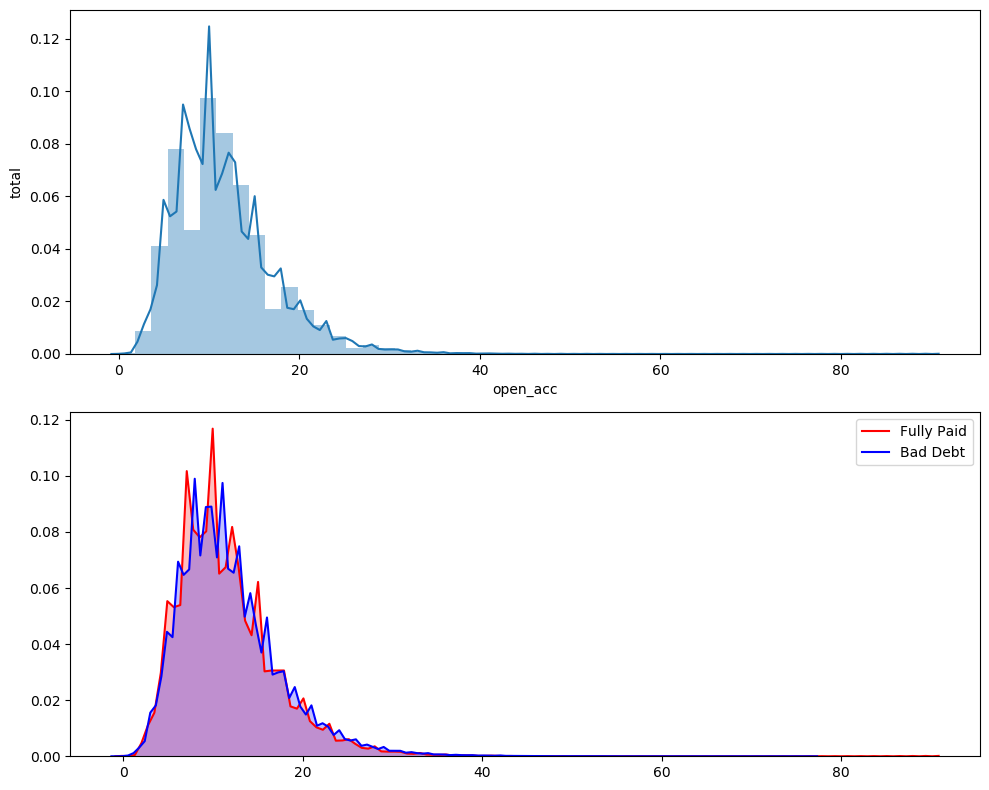

In [31]:
featplot('open_acc', True)

In [32]:
#encoding our categorical variable by giving each category a numerical value, helps us in finding coorealtion in further nalysis

finaldata.purpose=finaldata.purpose.astype("category", category=np.unique(finaldata.purpose)).cat.codes
finaldata.term=finaldata.term.astype("category", category=np.unique(finaldata.term)).cat.codes
finaldata.grade=finaldata.grade.astype("category", category=np.unique(finaldata.grade)).cat.codes
finaldata.sub_grade=finaldata.sub_grade.astype("category", category=np.unique(finaldata.sub_grade)).cat.codes
finaldata.home_ownership=finaldata.home_ownership.astype("category", category=np.unique(finaldata.home_ownership)).cat.codes
finaldata.verification_status=finaldata.verification_status.astype("category", category=np.unique(finaldata.verification_status)).cat.codes
finaldata.pymnt_plane=finaldata.pymnt_plan.astype("category", category=np.unique(finaldata.pymnt_plan)).cat.codes
finaldata.application_type=finaldata.application_type.astype("category", category=np.unique(finaldata.application_type)).cat.codes
finaldata.disbursement_method=finaldata.disbursement_method.astype("category", category=np.unique(finaldata.disbursement_method)).cat.codes
finaldata.loan_status=finaldata.loan_status.astype("category", category=np.unique(finaldata.loan_status)).cat.codes

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [33]:
finaldata.shape

(1325535, 27)

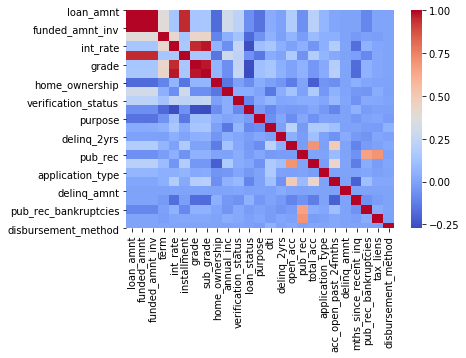

In [34]:
sns.heatmap(finaldata.corr(), cmap='coolwarm')

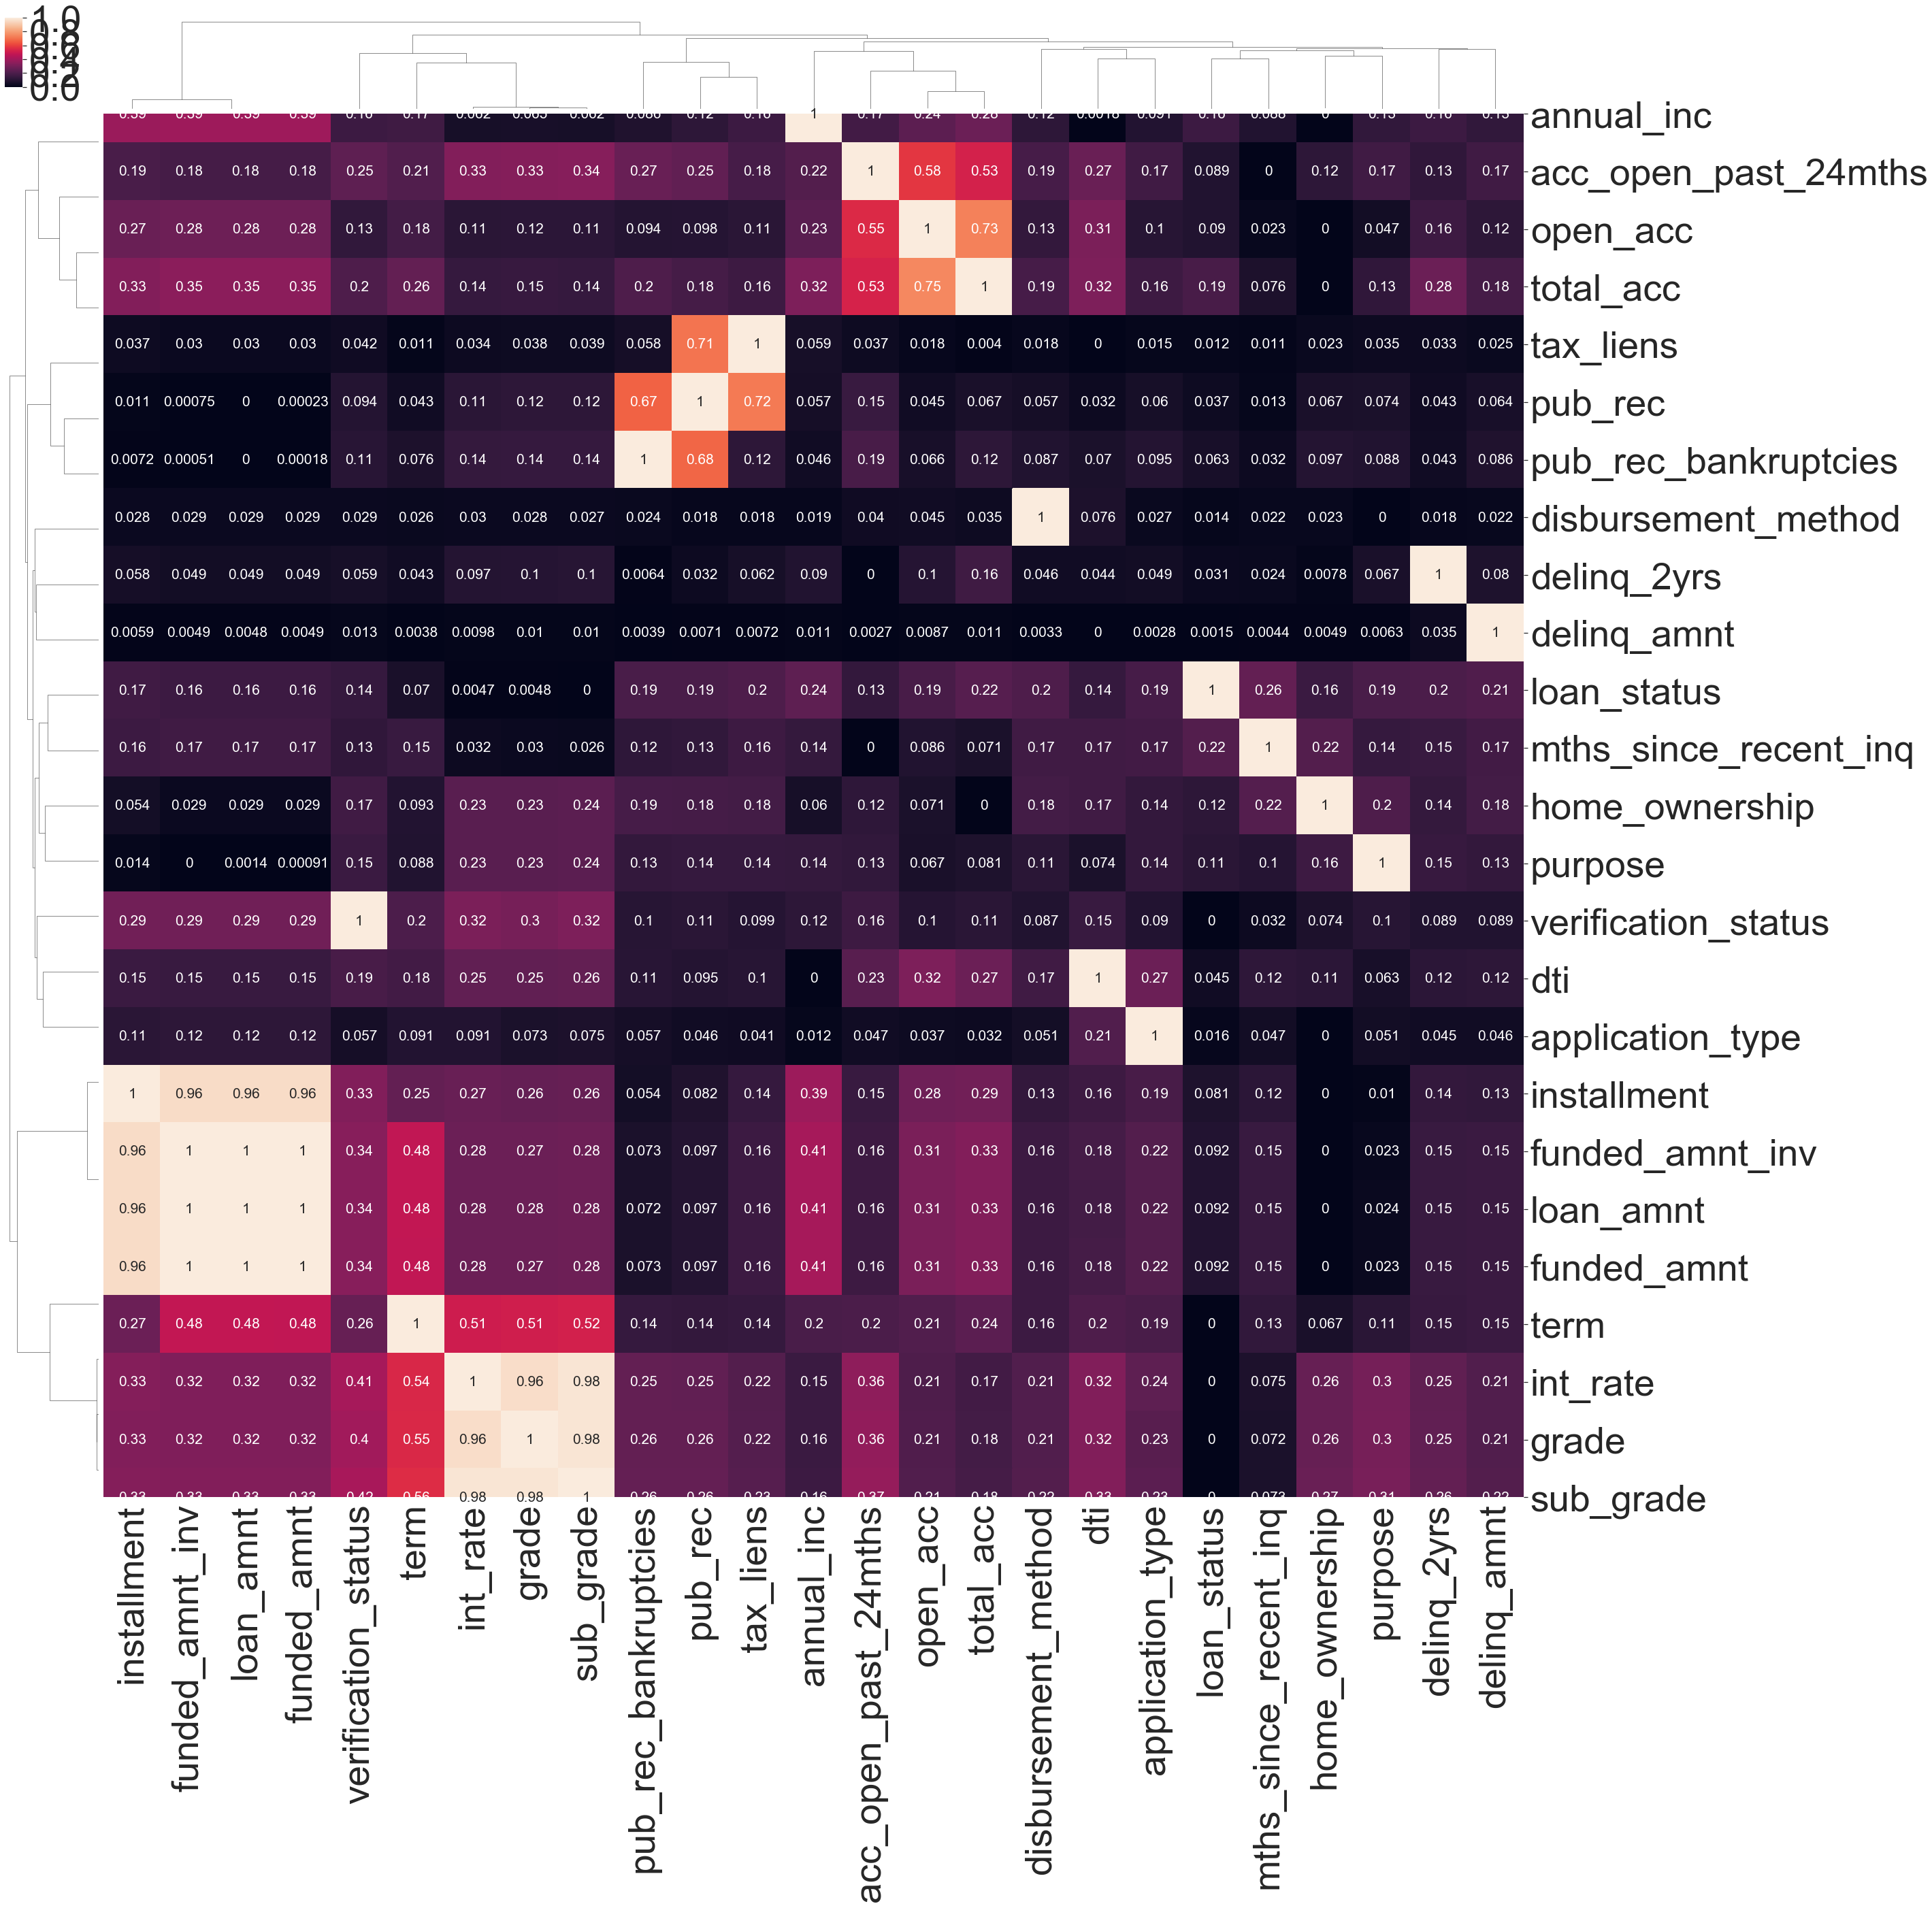

In [35]:
sns.set(font_scale=5)
sns.clustermap(finaldata.corr(), standard_scale=0,figsize=(40,40), annot=True, annot_kws={"size": 21} )

In [36]:
finaldata[finaldata.columns].corr()['loan_status']

loan_amnt               -0.070845
funded_amnt             -0.070935
funded_amnt_inv         -0.070790
term                    -0.180939
int_rate                -0.263400
installment             -0.056021
grade                   -0.263322
sub_grade               -0.269429
home_ownership          -0.071927
annual_inc               0.039678
verification_status     -0.088245
loan_status              1.000000
purpose                 -0.022711
dti                     -0.087709
delinq_2yrs             -0.021000
open_acc                -0.027819
pub_rec                 -0.026229
total_acc                0.015818
application_type        -0.033189
acc_open_past_24mths    -0.100080
delinq_amnt             -0.002859
mths_since_recent_inq    0.056128
pub_rec_bankruptcies    -0.025267
tax_liens               -0.010485
disbursement_method     -0.009318
Name: loan_status, dtype: float64

In [37]:
dropfeat2 = ['funded_amnt', 'funded_amnt_inv', 'installment', 'int_rate', 'grade', 'total_acc', 'tax_liens', 'disbursement_method']

In [38]:
modeldata=finaldata.drop(list(set(dropfeat2)), axis=1)
modeldata.shape

(1325535, 19)

In [39]:
modeldata[modeldata.columns].corr()['loan_status']

loan_amnt               -0.070845
term                    -0.180939
sub_grade               -0.269429
home_ownership          -0.071927
annual_inc               0.039678
verification_status     -0.088245
loan_status              1.000000
purpose                 -0.022711
dti                     -0.087709
delinq_2yrs             -0.021000
open_acc                -0.027819
pub_rec                 -0.026229
application_type        -0.033189
acc_open_past_24mths    -0.100080
delinq_amnt             -0.002859
mths_since_recent_inq    0.056128
pub_rec_bankruptcies    -0.025267
Name: loan_status, dtype: float64

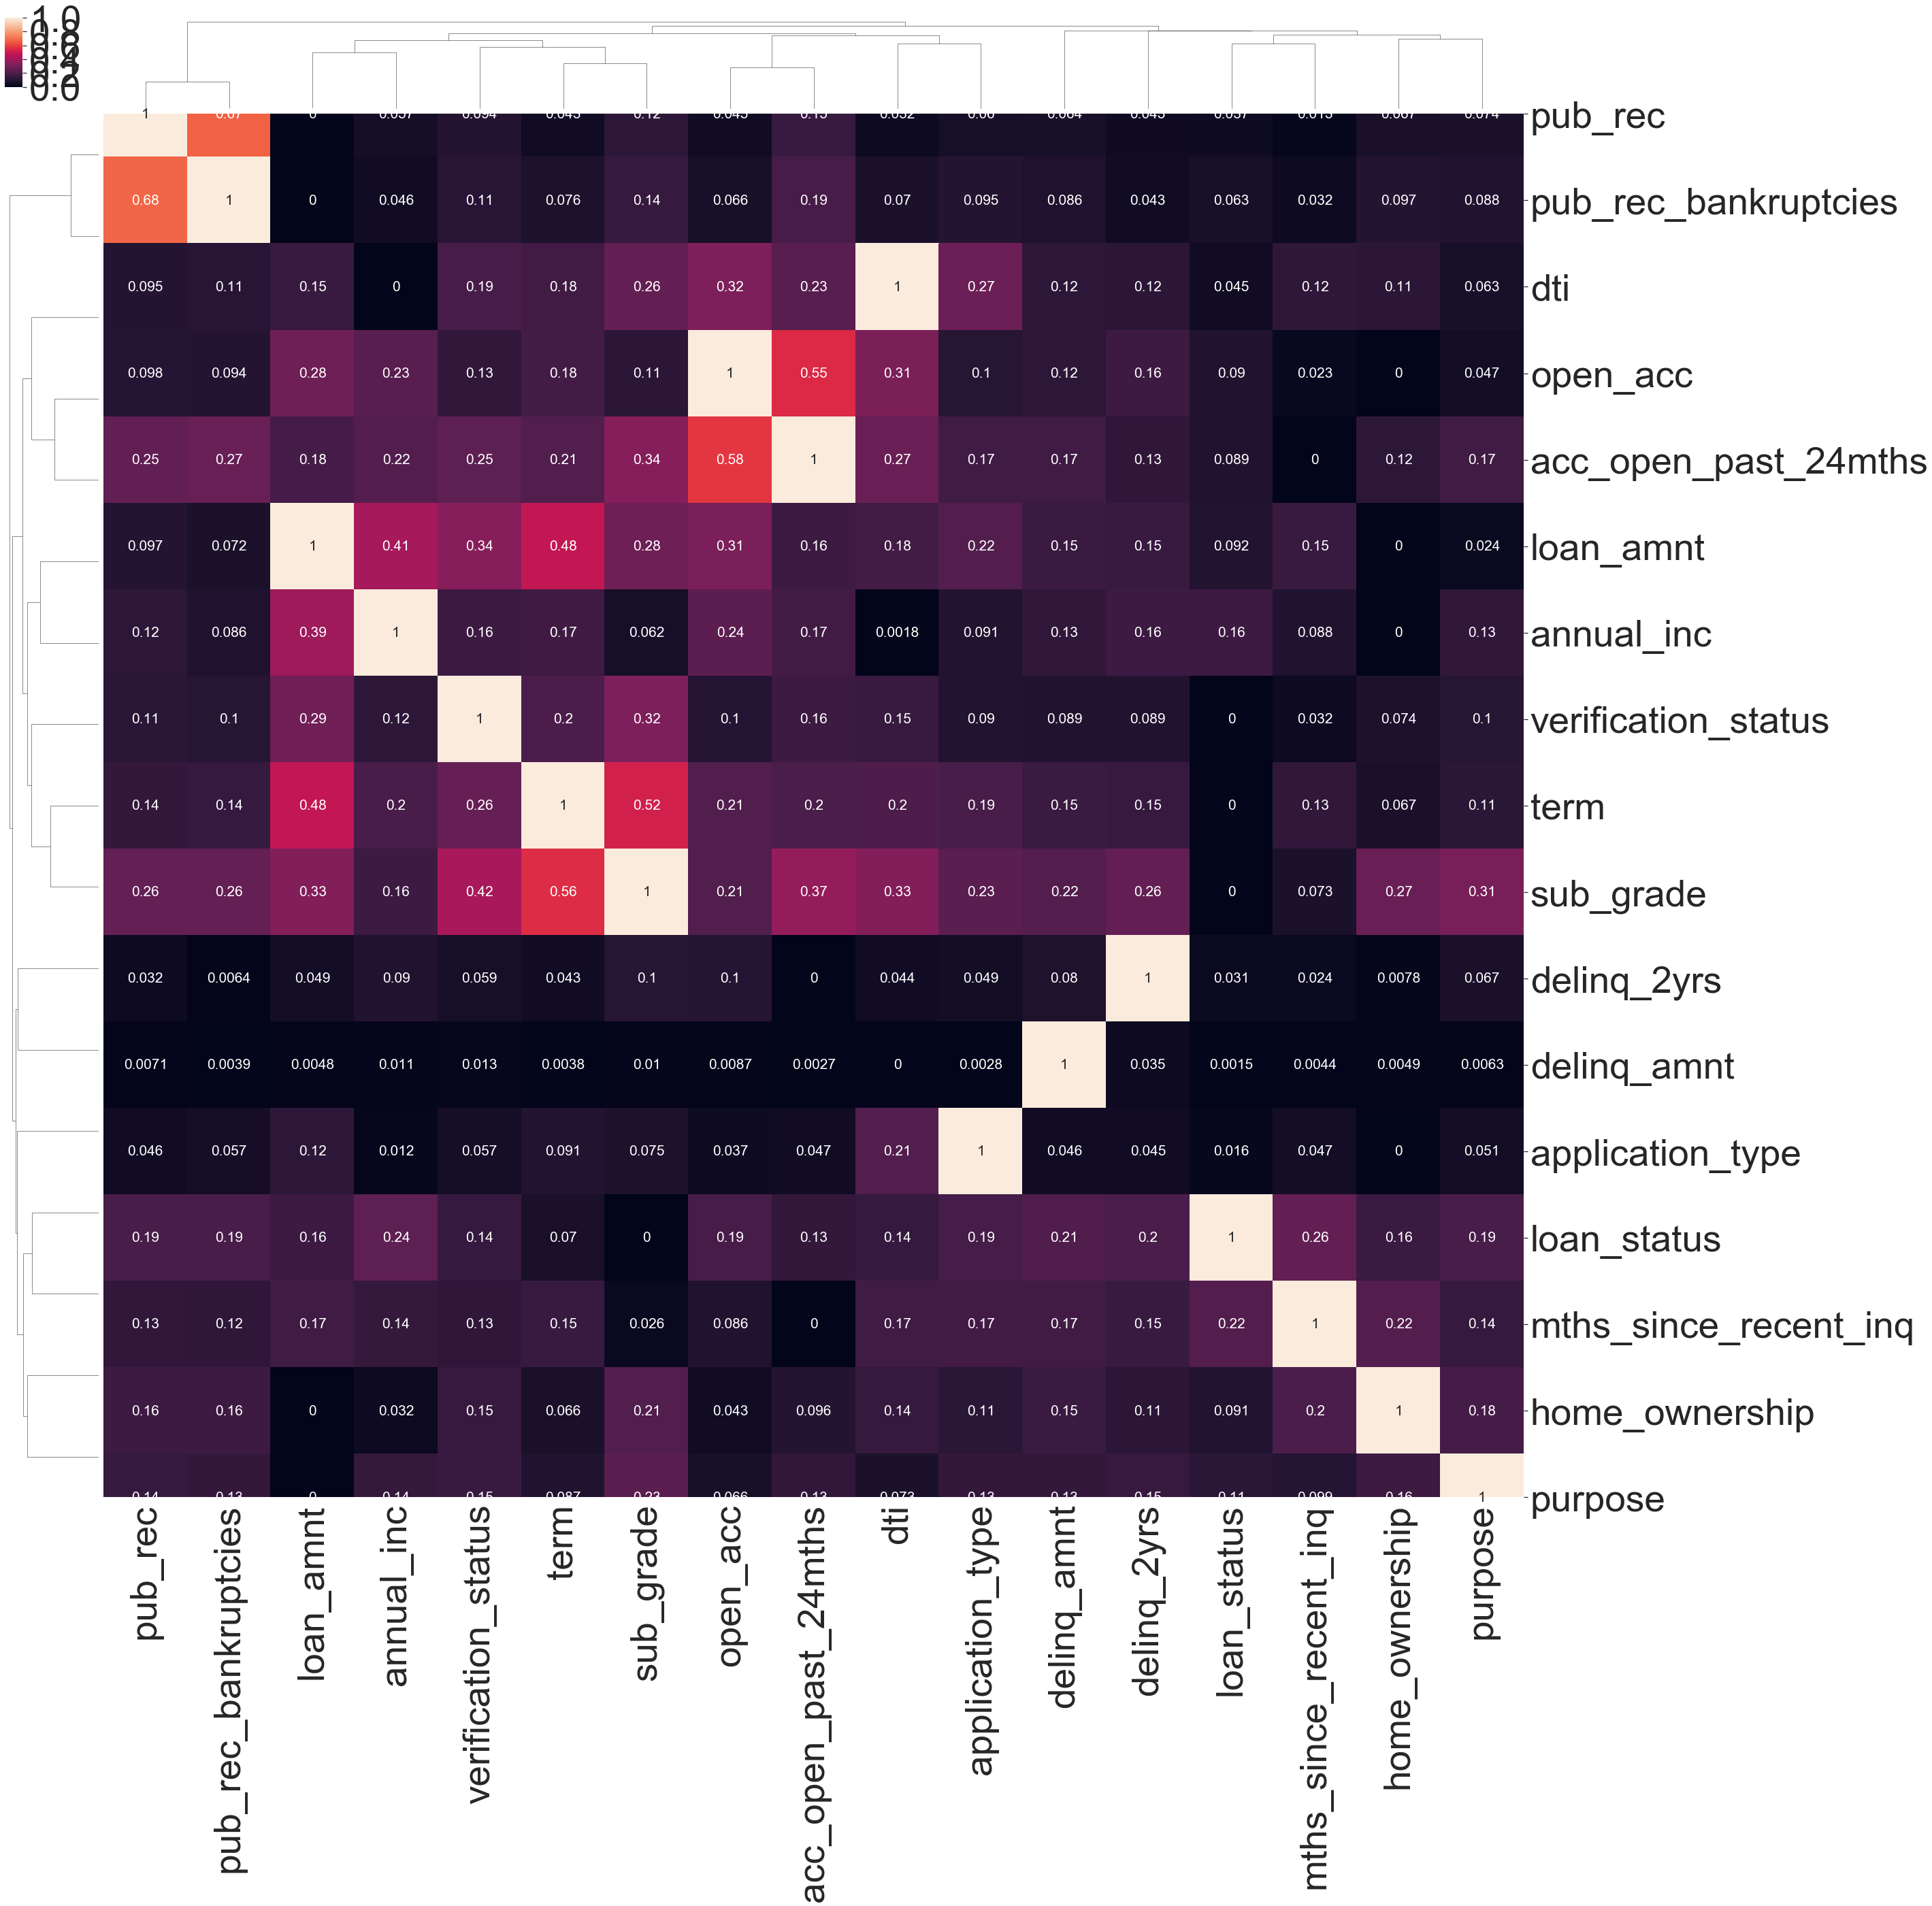

In [40]:
sns.set(font_scale=5)
sns.clustermap(modeldata.corr(), standard_scale=0,figsize=(40,40), annot=True, annot_kws={"size": 21} )

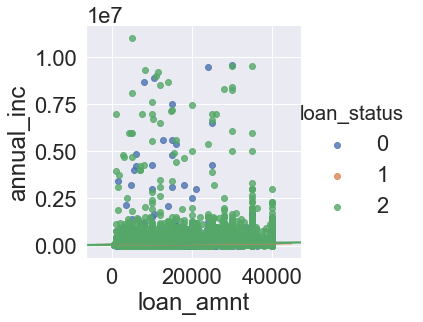

In [41]:
"""
for somewhat high correlated values in continuos category we see its scatterplot with a regression line

It helps us visualize how much correlation is between those 2 variables and distribution of Fully Paid v Bad Debt loans
"""
sns.set(font_scale=2)
sns.lmplot(x='loan_amnt', y='annual_inc', data=modeldata, hue='loan_status')